In [40]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [41]:
tc = pd.read_csv('tc.csv')

In [42]:
tc.columns

Index(['Survived', 'Fare', 'Family', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Age_(0, 10]', 'Age_(10, 20]', 'Age_(20, 30]', 'Age_(30, 40]',
       'Age_(40, 50]', 'Age_(50, 60]', 'Age_(60, 70]', 'Age_(70, 80]'],
      dtype='object')

In [43]:
X_train, X_test = train_test_split(tc, test_size=0.2, random_state=0)

y_train = X_train['Survived']
y_test = X_test['Survived']

del X_train['Survived']
del X_test['Survived']

best accuracy score = 0.812
best params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
accuracy = 0.832
f1_score = 0.750
roc_auc_score = 0.799


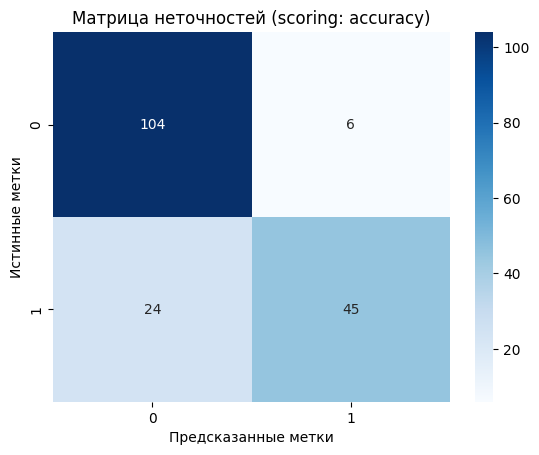

In [44]:
knn = KNeighborsClassifier()
param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'metric': ['euclidean', 'manhattan'],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
gs = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best accuracy score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

knna_accuracy = clf.score(X_test, y_test)
knna_f1_score = f1_score(y_test, y_pred)
knna_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {knna_accuracy:.3f}')
print(f'f1_score = {knna_f1_score:.3f}')
print(f'roc_auc_score = {knna_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: accuracy)')
plt.show()

best precision score = 0.849
best params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
accuracy = 0.832
f1_score = 0.750
roc_auc_score = 0.799


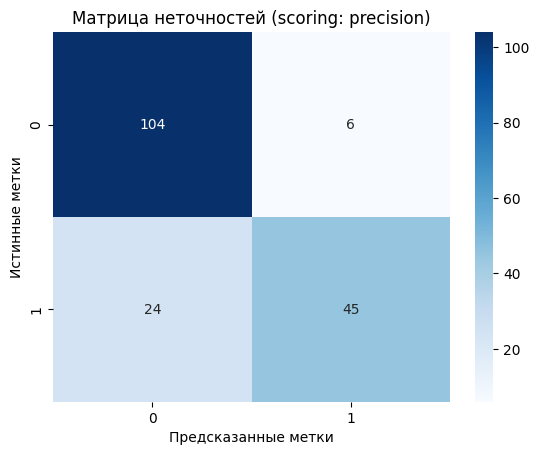

In [45]:
knn = KNeighborsClassifier()
param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'metric': ['euclidean', 'manhattan'],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
gs = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  scoring='precision',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best precision score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

knnp_accuracy = clf.score(X_test, y_test)
knnp_f1_score = f1_score(y_test, y_pred)
knnp_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {knnp_accuracy:.3f}')
print(f'f1_score = {knnp_f1_score:.3f}')
print(f'roc_auc_score = {knnp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

best recall score = 0.718
best params: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
accuracy = 0.821
f1_score = 0.768
roc_auc_score = 0.811


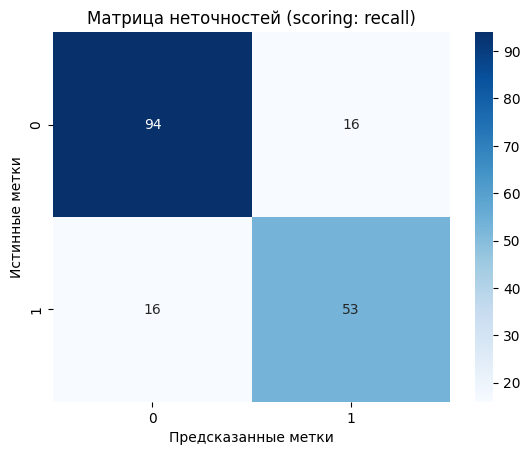

In [46]:
knn = KNeighborsClassifier()
param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'metric': ['euclidean', 'manhattan'],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
gs = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best recall score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

knnr_accuracy = clf.score(X_test, y_test)
knnr_f1_score = f1_score(y_test, y_pred)
knnr_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {knnr_accuracy:.3f}')
print(f'f1_score = {knnr_f1_score:.3f}')
print(f'roc_auc_score = {knnr_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: recall)')
plt.show()

(0.8, 0.84)

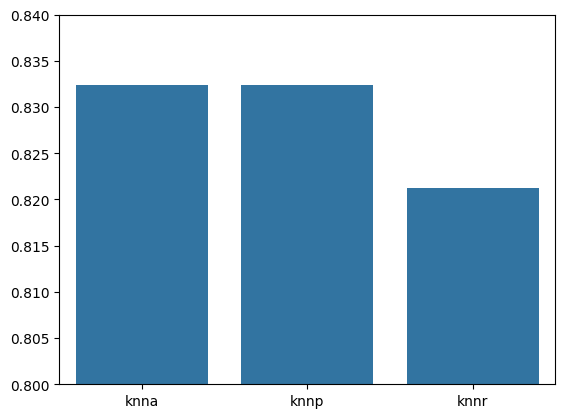

In [47]:
sns.barplot(x=['knna', 'knnp', 'knnr'], y=[knna_accuracy, knnp_accuracy, knnr_accuracy])
plt.ylim(0.8, 0.84)

(0.73, 0.78)

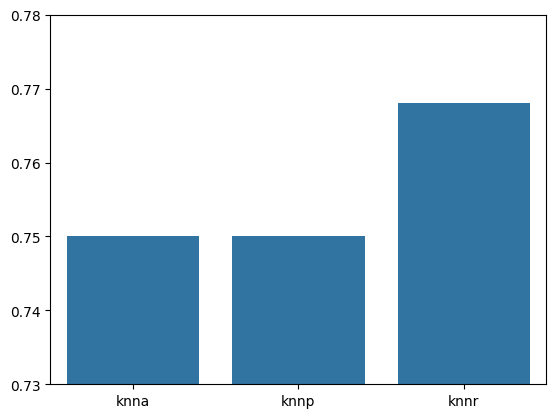

In [48]:
sns.barplot(x=['knna', 'knnp', 'knnr'], y=[knna_f1_score, knnp_f1_score, knnr_f1_score])
plt.ylim(0.73, 0.78)

(0.7, 0.82)

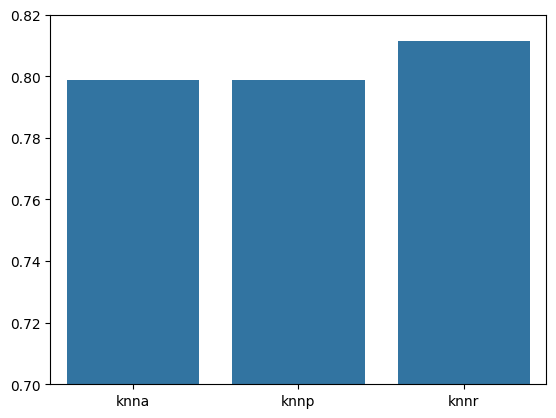

In [49]:
sns.barplot(x=['knna', 'knnp', 'knnr'], y=[knna_roc, knnp_roc, knnr_roc])
plt.ylim(0.7, 0.82)